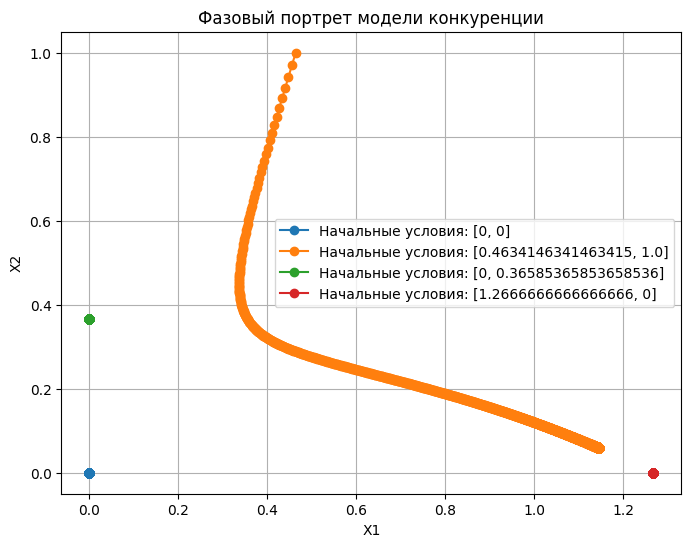

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def runge_kutta4(f, t, y0):
    n = len(t)
    m = len(y0)
    y = np.zeros((n, m))
    y[0] = y0

    for i in range(1, n):
        h = t[i] - t[i - 1]
        k1 = h * f(t[i - 1], y[i - 1])
        k2 = h * f(t[i - 1] + 0.5 * h, y[i - 1] + 0.5 * k1)
        k3 = h * f(t[i - 1] + 0.5 * h, y[i - 1] + 0.5 * k2)
        k4 = h * f(t[i - 1] + h, y[i - 1] + k3)

        y[i] = y[i - 1] + (k1 + 2 * k2 + 2 * k3 + k4) / 6

    return y

def competition_model(t, y, a1_p, b1_p, c1_p, a2_p, b2_p, c2_p):
    x1, x2 = y
    
    return np.array(
        [
            (a1_p - b1_p * x1 - c1_p * x2) * x1,
            (a2_p - b2_p * x1 - c2_p * x2) * x2
        ]
    )

a1, b1, c1 = 19, 15, 31
a2, b2, c2 = 15, 11, 41

x1_stat = (a1 * c2) / (b1 * c1 + b2 * c2)
x2_stat = (a2 * c1) / (b1 * c1 + b2 * c2)

"""
a1: ...
b1: within species competition coefficient
c1: inter species cooperation coefficient
...
"""

initial_conditions = [
    [0, 0],             
    [a1/c2, a2/b1], 
    [0, a2 / c2],       
    [a1 / b1, 0]        
]

# Временные параметры для решения системы
t_start, t_end, num_points = 0, 10, 10000
t_values = np.linspace(t_start, t_end, num_points)

# Решение системы с использованием метода Рунге-Кутты для каждого набора начальных условий
solutions = []
for initial_condition in initial_conditions:
    solution = runge_kutta4(lambda t, y: competition_model(t, y, a1, b1, c1, a2, b2, c2), t_values, initial_condition)
    solutions.append(solution)

# Построение фазового портрета
plt.figure(figsize=(8, 6))
for solution, initial_condition in zip(solutions, initial_conditions):
    plt.plot(solution[:, 0], solution[:, 1], label=f'Начальные условия: {initial_condition}', marker='o')

plt.title('Фазовый портрет модели конкуренции')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.show()